In [2]:
import sounddevice as sd
import numpy as np
from scipy.io.wavfile import write

# Parameters
duration = 15  # seconds
sample_rate = 44100  # Hertz

# Record audio
print("Recording...")
audio_data = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='int16')
sd.wait()  # Wait until the recording is finished
print("Recording finished.")

# Save the recorded audio to a WAV file
filename = 'sample_audio.wav'
write(filename, sample_rate, audio_data)

print(f"Audio recorded and saved as {filename}.")

Recording...
Recording finished.
Audio recorded and saved as sample_audio.wav.


In [16]:
import numpy as np
from scipy.io import wavfile
from scipy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt
from IPython.display import Audio

def read_voice(path):
    rate, data = wavfile.read(path)
    amplitude = rfft(data)
    frequency = rfftfreq(len(data), 1/rate)
    return rate, data, amplitude, frequency

# Example usage:
rate, data, amplitude, frequency = read_voice('data/audio/sample_audio.wav')
Audio(data, rate=rate)

In [4]:
def change_speed(data, speed_factor):
    indices = np.round(np.arange(0, len(data), speed_factor)).astype(int)
    indices = indices[indices < len(data)]
    return data[indices]

# Example usage:
new_data = change_speed(data, 2)  # تغییر سرعت به 1.5 برابر
Audio(new_data, rate=rate)

In [9]:
def low_pass_filter(frequency, amplitude, cutoff_freq):
    filtered_amplitude = np.where(frequency > cutoff_freq, 0, amplitude)
    return filtered_amplitude

# Example usage:
cutoff_freq = 500  # فرکانس قطع
filtered_amplitude = low_pass_filter(frequency, amplitude, cutoff_freq)
filtered_data = np.fft.irfft(filtered_amplitude)
Audio(filtered_data, rate=rate)

In [10]:
def reverse_voice(data):
    return data[::-1]

# Example usage:
reversed_data = reverse_voice(data)
Audio(reversed_data, rate=rate)

In [11]:
def mix_voices(data_list, rate_list):
    min_length = min(len(data) for data in data_list)
    mixed_data = np.zeros(min_length)
    
    for data in data_list:
        mixed_data += data[:min_length]
        
    mixed_data /= len(data_list)  # میانگین‌گیری از صداها
    return rate_list[0], mixed_data

# Example usage:
rate, data1, amplitude, frequency = read_voice('potc.wav')
data2 = data
rate, mixed_data = mix_voices([data1, data2], [44100, 44100])
Audio(mixed_data, rate=rate)

In [12]:
def plot_amplitude_frequency(amplitude, frequency, title="Amplitude-Frequency"):
    plt.figure(figsize=(10, 4))
    plt.plot(frequency, np.abs(amplitude))
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

def plot_spectrogram(data, rate, title="Spectrogram"):
    plt.figure(figsize=(10, 4))
    plt.specgram(data, Fs=rate)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label='Intensity (dB)')
    plt.show()

In [14]:
def write_voice(data, rate, path):
    wavfile.write(path, rate, data.astype(np.int16))

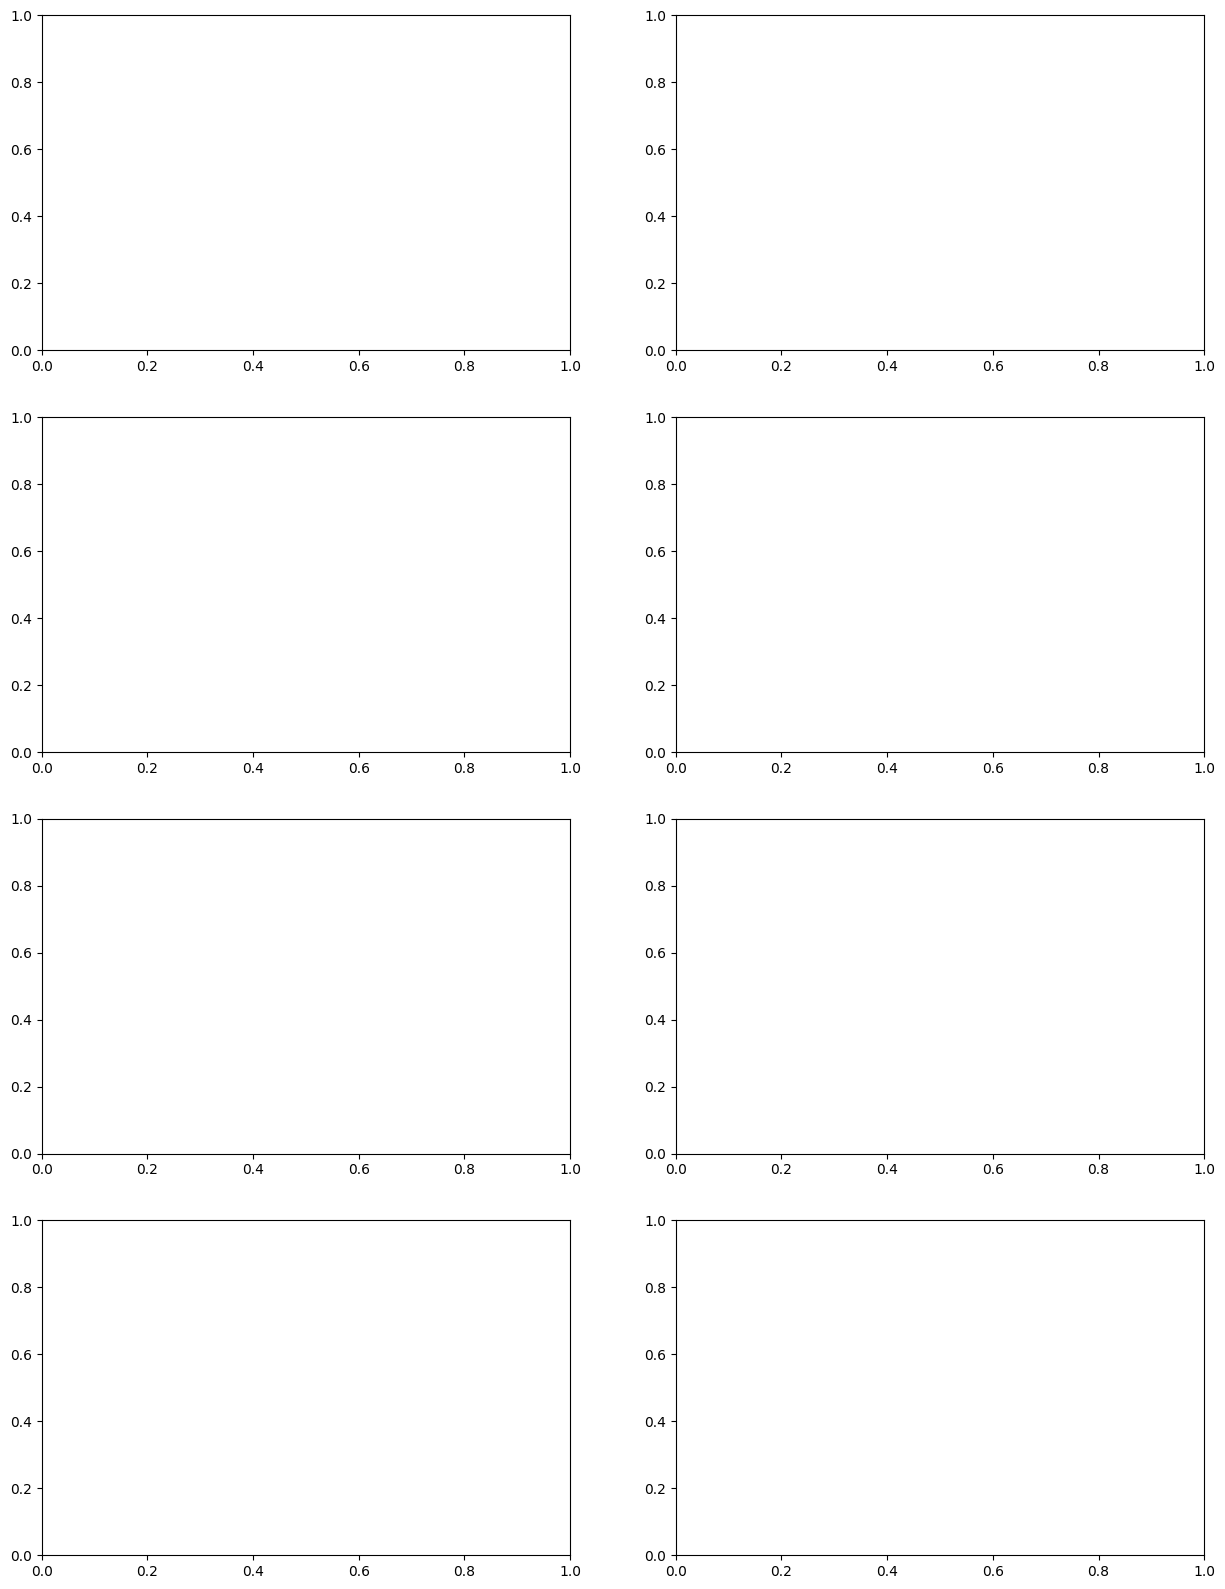

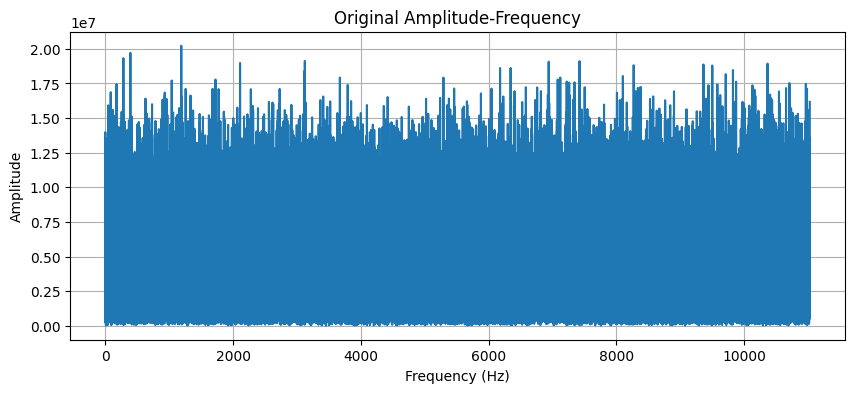

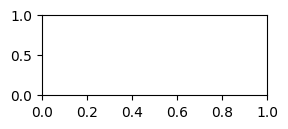

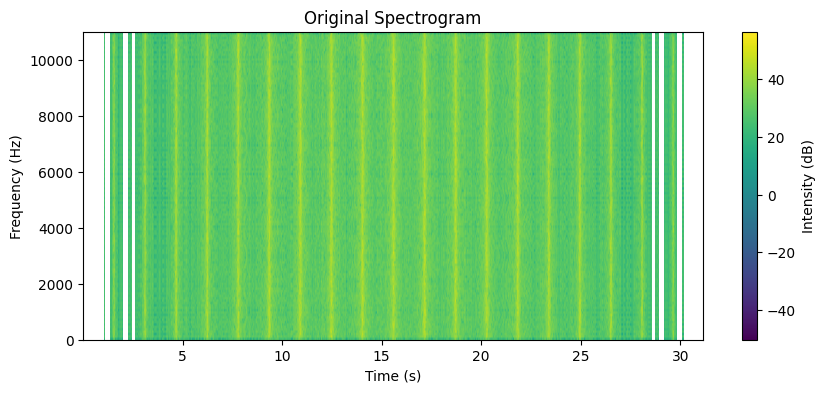

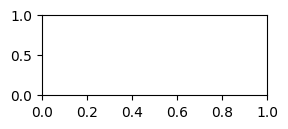

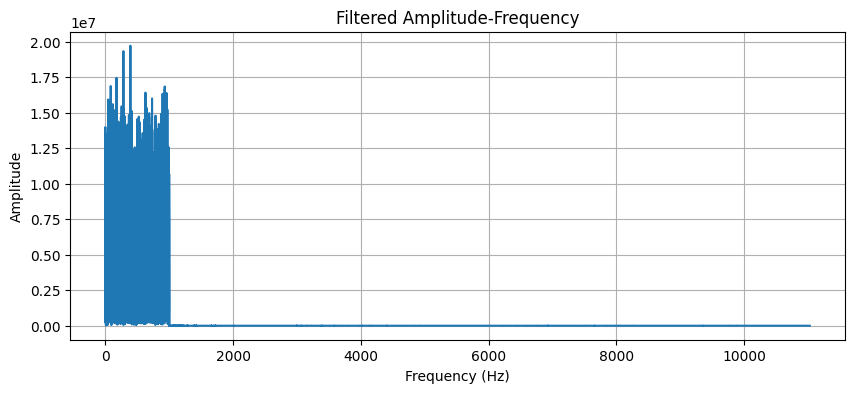

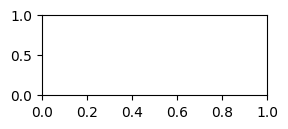

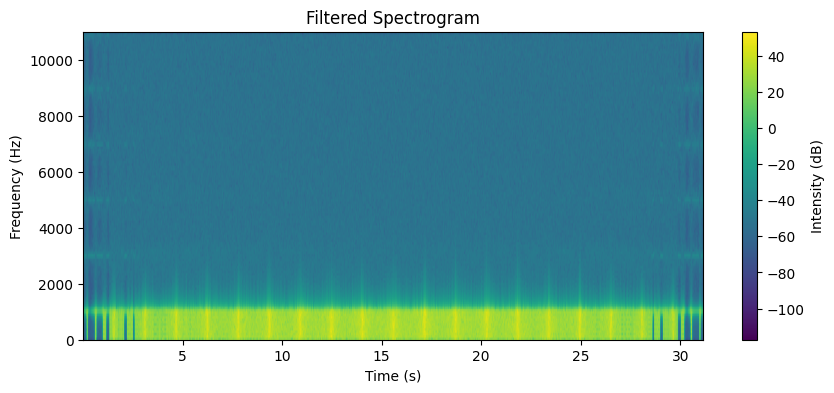

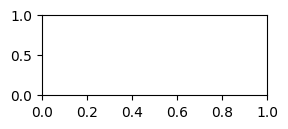

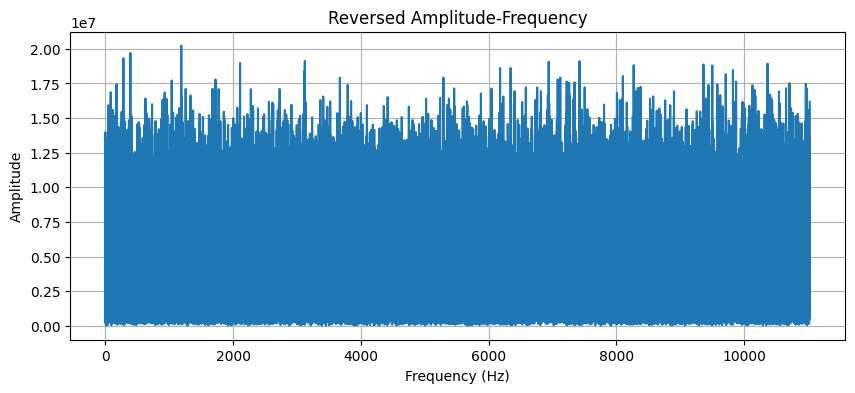

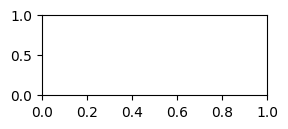

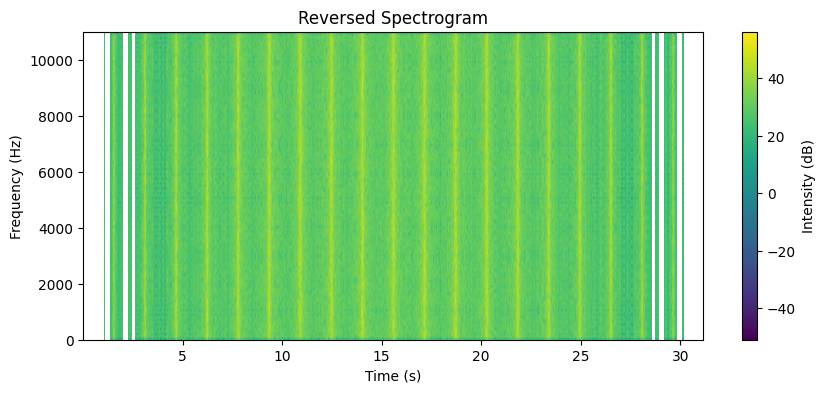

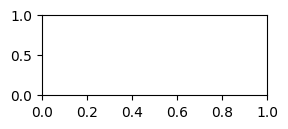

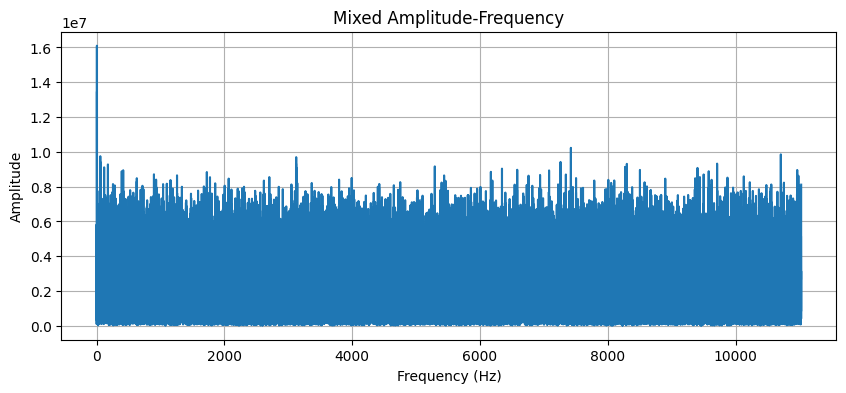

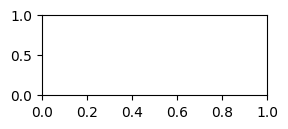

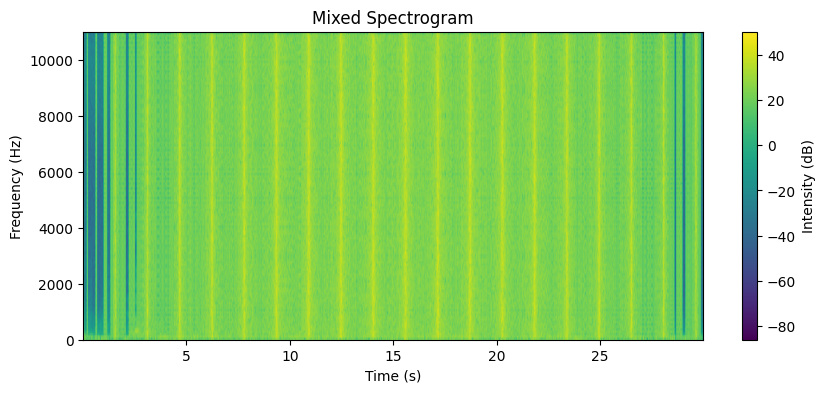

<Figure size 640x480 with 0 Axes>

In [24]:
# خواندن فایل صوتی
rate, data, amplitude, frequency = read_voice('data/audio/potc.wav')
Audio(data, rate=rate)

# حذف نویز
cutoff_freq = 1000  # فرضی
filtered_amplitude = low_pass_filter(frequency, amplitude, cutoff_freq)
filtered_data = np.fft.irfft(filtered_amplitude)
Audio(filtered_data, rate=rate)
write_voice(filtered_data, rate, 'data/newaudio/cleanpotc.wav')

# معکوس کردن صوت و ذخیره
reversed_data = reverse_voice(data)
Audio(reversed_data, rate=rate)
write_voice(reversed_data, rate, 'data/newaudio/revpotc.wav')

# ترکیب صداها
newaudio_paths = ['data/audio/potc.wav', 'data/audio/sample_audio.wav']  # فرضی
data_list, rate_list = [], []

for path in newaudio_paths:
    rate, data = wavfile.read(path)
    data_list.append(data)
    rate_list.append(rate)

rate, mixed_data = mix_voices(data_list, rate_list)
Audio(mixed_data, rate=rate)
write_voice(mixed_data, rate, 'data/newaudio/mixpotc.wav')

# Plotting all charts in subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

# Original audio
rate, data, amplitude, frequency = read_voice('data/audio/potc.wav')
plt.subplot(4, 2, 1)
plot_amplitude_frequency(amplitude, frequency, title="Original Amplitude-Frequency")
plt.subplot(4, 2, 2)
plot_spectrogram(data, rate, title="Original Spectrogram")

# Filtered audio
filtered_rate, filtered_data, filtered_amplitude, filtered_frequency = read_voice('data/newaudio/cleanpotc.wav')
plt.subplot(4, 2, 3)
plot_amplitude_frequency(filtered_amplitude, filtered_frequency, title="Filtered Amplitude-Frequency")
plt.subplot(4, 2, 4)
plot_spectrogram(filtered_data, filtered_rate, title="Filtered Spectrogram")

# Reversed audio
reversed_rate, reversed_data, reversed_amplitude, reversed_frequency = read_voice('data/newaudio/revpotc.wav')
plt.subplot(4, 2, 5)
plot_amplitude_frequency(reversed_amplitude, reversed_frequency, title="Reversed Amplitude-Frequency")
plt.subplot(4, 2, 6)
plot_spectrogram(reversed_data, reversed_rate, title="Reversed Spectrogram")

# Mixed audio
mixed_rate, mixed_data, mixed_amplitude, mixed_frequency = read_voice('data/newaudio/mixpotc.wav')
plt.subplot(4, 2, 7)
plot_amplitude_frequency(mixed_amplitude, mixed_frequency, title="Mixed Amplitude-Frequency")
plt.subplot(4, 2, 8)
plot_spectrogram(mixed_data, mixed_rate, title="Mixed Spectrogram")

# Adjust layout
plt.tight_layout()
plt.show()